### here is a file for any code related to feature extraction :) 
### and remember, you are capable of many great things!

In [28]:
# Import all libraries here

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# Parse json file 

result = pd.read_json('../data/data_train.json')
result

,stars,useful,funny,cool,text,date
0,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38
...,...,...,...,...,...,...
334290,5,1,1,1,I was very surprised by how flavorful the food...,2016-07-31 07:40:05
334291,3,1,0,1,"The theater is nice, very comfortable chairs a...",2014-03-25 14:48:09
334292,5,1,1,1,My dog just loves it and so do I. I have broug...,2018-03-23 02:24:21
334293,1,3,3,1,"Bug in food, followed by terrible handling of ...",2012-11-17 01:49:15


number of one stars =  49031
number of two stars =  27028
number of three stars =  36987
number of four stars =  73604
number of five stars =  147645


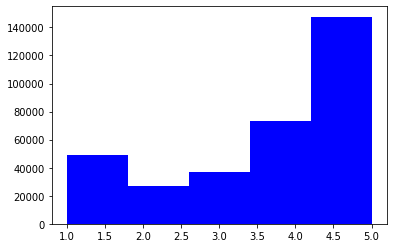

In [11]:
# Create a dataframe for each star rating

groups = result.groupby('stars')

star_dataframes = []
for name,group in groups:
    star_dataframes.append(group)
   


one_star = star_dataframes[0]
print('number of one stars = ', len(one_star.index))

two_star = star_dataframes[1]
print('number of two stars = ', len(two_star.index))

three_star = star_dataframes[2]
print('number of three stars = ', len(three_star.index))

four_star = star_dataframes[3]
print('number of four stars = ', len(four_star.index))

five_star = star_dataframes[4] 
print('number of five stars = ', len(five_star.index))


# Creating a visual for distribution of data
freq_data = []
for x in range(len(one_star.index)):
    freq_data.append(1)
for x in range(len(two_star.index)):
    freq_data.append(2)
for x in range(len(three_star.index)):
    freq_data.append(3)
for x in range(len(four_star.index)):
    freq_data.append(4)
for x in range(len(five_star.index)):
    freq_data.append(5)
    
num_bins = 5
n, bins, patches = plt.hist(freq_data, num_bins, facecolor='blue', alpha=1)
plt.show()

In [ ]:
# Demo feature engineering (class = 1 star, feature = useful)
max = 0
for index, row in one_star.iterrows():
    if row['useful']>max:
        max = row['useful']
 
useful_frequency = []
for x in range(max +1):
    useful_frequency.append(0)
for x in range(max +1):
    total = 0
    for index, row in one_star.iterrows():
        if row['useful'] == x:
            total += 1
    useful_frequency[x] = total
print(useful_frequency)

#wrong histogram, need to tweak
#num_bins = max+1
#n, bins, patches = plt.hist(useful_frequency, num_bins, facecolor='blue', alpha=0.5)
#plt.show()

In [ ]:
# Looking at 'useful' as a possible feature (class = 2 star)
max = 0
for index, row in two_star.iterrows():
    if row['useful']>max:
        max = row['useful']
 
useful_frequency = []
for x in range(max +1):
    useful_frequency.append(0)
for x in range(max +1):
    total = 0
    for index, row in one_star.iterrows():
        if row['useful'] == x:
            total += 1
    useful_frequency[x] = total
print(useful_frequency)

In [14]:
# Looking at 'funny' as a possible feature (class = 2 star)
max = 0
for index, row in two_star.iterrows():
    if row['funny']>max:
        max = row['funny']
 
useful_frequency = []
for x in range(max +1):
    useful_frequency.append(0)
for x in range(max +1):
    total = 0
    for index, row in one_star.iterrows():
        if row['funny'] == x:
            total += 1
    useful_frequency[x] = total
print(useful_frequency)

[35525, 7621, 2868, 1271, 642, 353, 218, 145, 107, 57, 51, 39, 21, 21, 13, 15, 6, 8, 6, 4, 3, 2, 3, 5, 2, 4, 3, 3, 1, 5, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0]


In [42]:
# From geeksforgeeks for list intersection
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [40]:
# Bag of words feature extraction - class = 2 stars
reviews = []
for index, row in two_star.iterrows():
    reviews.append(row['text'])
  
reviews2 = []
i = 0
for index, row in two_star.iterrows():
    i = i+1
    if i <= 20:
        reviews2.append(row['text'])
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(reviews)
#X.todense()
#print(vectorizer.get_feature_names())
#print(reviews)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(reviews2)
print(len(vectorizer.get_feature_names()))

1117


In [43]:
# Bag of words feature extraction (more selective) - class = 2 stars
tfidf_2 = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
features_2 = tfidf_2.fit_transform(reviews2)
print(len(tfidf_2.get_feature_names()))

557


In [45]:
reviews1 = []
i = 0
for index, row in one_star.iterrows():
    i = i+1
    if i <= 20:
        reviews1.append(row['text'])

# Bag of words feature extraction (more selective) - class = 2 stars
tfidf_1 = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
features_1 = tfidf_1.fit_transform(reviews1)
print(len(tfidf_1.get_feature_names()))

600


In [46]:
print(intersection(tfidf_1.get_feature_names(), tfidf_2.get_feature_names()))

['10', '15', 'about', 'actually', 'after', 'again', 'all', 'almost', 'also', 'am', 'an', 'and it', 'and the', 'and they', 'another', 'any', 'anything', 'are', 'around', 'as', 'as well', 'asked', 'at all', 'at least', 'at the', 'attention', 'back', 'back to', 'bad', 'bar', 'because', 'been', 'before', 'being', 'better', 'big', 'bring', 'busy', 'but the', 'by', 'came', 'can', 'card', 'care', 'come', 'could', 'couldn', 'counter', 'couple', 'customer', 'customer service', 'days', 'did', 'did not', 'didn', 'different', 'dinner', 'disappointed', 'do', 'don', 'down', 'else', 'even', 'every', 'experience', 'few', 'finally', 'fine', 'food', 'food and', 'food was', 'for my', 'for the', 'from', 'front', 'gave', 'get', 'getting', 'give', 'go', 'going', 'going on', 'going to', 'good', 'great', 'guy', 'had to', 'has', 'having', 'he', 'he was', 'her', 'here', 'his', 'horrible', 'how', 'however', 'if', 'if you', 'in the', 'in this', 'into', 'it was', 'just', 'know', 'last', 'least', 'left', 'let', 'li

In [ ]:
reviews1 = []
i = 0
for index, row in one_star.iterrows():
    i = i+1
    if i <= 20:
        reviews1.append(row['text'])

# Bag of words feature extraction (more selective) - class = 2 stars
tfidf_1 = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
features_1 = tfidf_1.fit_transform(reviews1)
print(len(tfidf_1.get_feature_names()))